In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import  f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [5]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\Fraud.csv')

In [6]:
# top 5 rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
# backup data set
dataset=df.copy()

In [8]:
# shape of the data
df.shape

(6362620, 11)

In [9]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
# finding null value
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
# Statistics description of each features
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [12]:
# is any duplicate value present in data set
df.duplicated().sum()

0

In [13]:
# correlation between each features
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [14]:
# count number of fraud and not fraud data
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

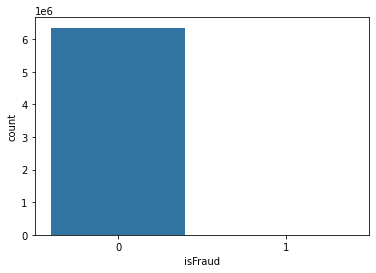

In [15]:
# countplot of isFraud 
sns.countplot(df['isFraud'])

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


<AxesSubplot:>

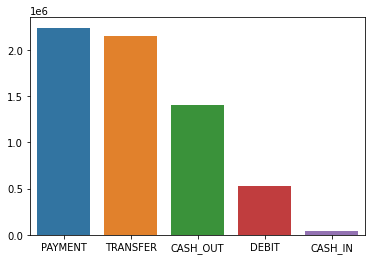

In [16]:
# Count number of data point in each type of transaction
print(df['type'].value_counts())
sns.barplot(x=df['type'].unique(),y=np.array(df['type'].value_counts()))

In [17]:
#Groupby type
df.groupby('type')['isFraud','isFlaggedFraud'].sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4696\2882374570.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('type')['isFraud','isFlaggedFraud'].sum()


,isFraud,isFlaggedFraud
type,,
CASH_IN,0,0
CASH_OUT,4116,0
DEBIT,0,0
PAYMENT,0,0
TRANSFER,4097,16


In [18]:

dataset['OrigC']=dataset['nameOrig'].apply(lambda x: 1 if str(x).find('C')==0 else 0)
dataset['DestC']=dataset['nameDest'].apply(lambda x: 1 if str(x).find('C')==0 else 0)
dataset['TRANSFER']=dataset['type'].apply(lambda x: 1 if x=='TRANSFER' else 0)
dataset['CASH_OUT']=dataset['type'].apply(lambda x: 1 if x=='CASH_OUT' else 0)

In [19]:
# Calculating Amount error
dataset['OrigAmntErr']=(abs(dataset.oldbalanceOrg-dataset.newbalanceOrig)-dataset.amount)

In [26]:
dataset.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,OrigC,DestC,TRANSFER,CASH_OUT,OrigAmntErr
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,1,0,0,0,1.455192e-11
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,1,0,0,0,-1.136868e-12
2,1,181.00,181.0,0.00,0.0,0.0,1,1,1,1,0,0.000000e+00
3,1,181.00,181.0,0.00,21182.0,0.0,1,1,1,0,1,0.000000e+00
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,1,0,0,0,0.000000e+00


In [21]:
# drop columns 
dataset.drop(columns=['nameOrig','nameDest','isFlaggedFraud','type'],inplace=True)

In [22]:
# Creating X and y for spliting dataset into test and train
X=dataset.drop('isFraud',axis=1)
Y=dataset.isFraud

In [23]:
# splinting data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=42, shuffle=False)

In [25]:
Y.head(9)

0    0
1    0
2    1
3    1
4    0
5    0
6    0
7    0
8    0
Name: isFraud, dtype: int64

In [28]:
# logisticregression
clf1=LogisticRegression()

In [30]:
clf1.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred=clf1.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred)

0.9980228270743813

In [50]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,1904216,0
1,2,4568


In [51]:
print('F1 - score :',(f1_score(y_test,y_pred)))

F1 - score : 0.9997811337272926


In [35]:
# randomforestclassifier
clf2=RandomForestClassifier()

In [36]:
clf2.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
y_pred1=clf2.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred1)

0.9999989522136059

In [52]:
print('F1 - score :',(f1_score(y_test,y_pred1)))

F1 - score : 0.9997811337272926


In [53]:
pd.DataFrame(confusion_matrix(y_test,y_pred1))

,0,1
0,1904216,0
1,2,4568
